In [1]:
from pathlib import Path 
import sys
import ProbabilisticParcellation.util as ut
import ProbabilisticParcellation.individ_group as ig
import ProbabilisticParcellation.plot as ppp
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

fig_dir = '/Users/jdiedrichsen/Dropbox (Diedrichsenlab)/papers/AtlasPaper/figure_parts'

## Plot and save individual parcellations
See individual_sym_asym.ipynb


## Plot inidividual variability
See individual_variability.ipynb


## Plot probability maps

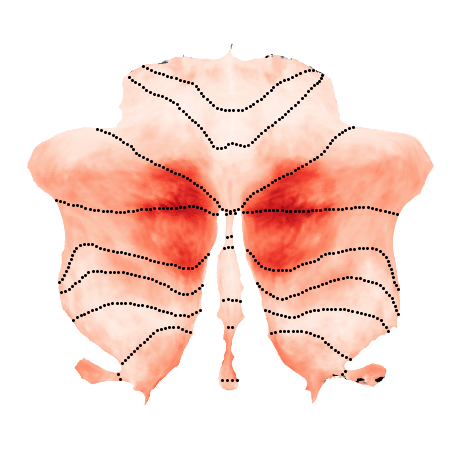

In [3]:
plt.figure(figsize=(8, 8))
ppp.plot_parcel_prob('S1','NettekovenSym32',space='MNISymC2',backgroundcolor='w',bordercolor='k')
plt.savefig(fig_dir + 'Prob_S1.png',bbox_inches='tight')

In [ ]:
plt.figure(figsize=(8, 8))
ppp.plot_parcel_prob('S2','NettekovenSym32',space='MNISymC2',backgroundcolor='w',bordercolor='k')
plt.savefig(fig_dir + 'Prob_S2.png',bbox_inches='tight')

## Calculate the individual-group analysis and save as file

In [ ]:
mname = 'Models_03/NettekovenSym32_space-MNISymC2'
info,model = ut.load_batch_best(mname)
Uhat_data,Uhat_complete,Uhat_group = ig.get_individ_group_mdtb(model,atlas='MNISymC2')
D = ig.evaluate_dcbc(Uhat_data,Uhat_complete,Uhat_group,atlas='MNISymC2')

## Load results and plot Figure

In [77]:
def plot_dcbc(fname,normalize=True):
    plt.figure(figsize=(5,4))
    D = pd.read_csv(ut.model_dir + '/Models/Evaluation_03/' + fname,sep='\t')
    gm = D.dcbc[D.type=='group'].mean()
    ## Subtract the value of 'group' from the individual dcbc values
    if normalize:
        A=pd.pivot_table(D[D.type=='group'],values='dcbc',index='subject')
        baseline = A.loc[D.subject,'dcbc'].values 
        D.dcbc=D.dcbc-baseline+gm
    sb.lineplot(data=D[D.type!='group'],
    y='dcbc',x='runs',hue='type',markers=True, dashes=False)
    sb.despine()
    runs = np.arange(16,dtype=int)+1
    labels = [f'{i*10}' if (i==1 or i%4==0) else '' for i in runs]

    plt.xticks(ticks=runs,labels=labels)
    plt.xlabel('Functional localizer [min]')
    plt.axhline(gm,color='b',ls=':')



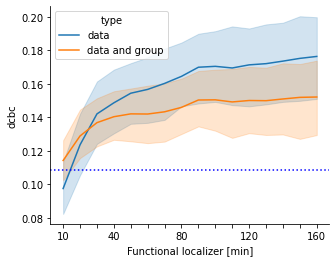

In [83]:
plot_dcbc('indivgroup_NettekovenSym32.tsv')

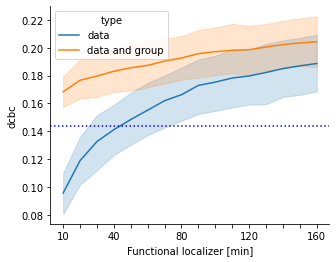

In [79]:
plot_dcbc('indivgroup_asym_Md_K17.tsv')
# t.ylim([0.21,0.3])


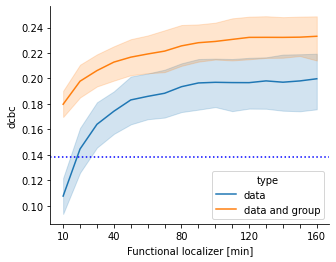

In [80]:
plot_dcbc('indivgroup_asym_Md_K68.tsv')

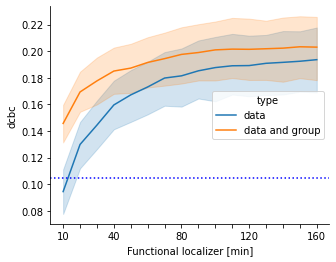

In [81]:
plot_dcbc('indivgroup_asym_MdPoNiIbWmDeSo_K68.tsv')

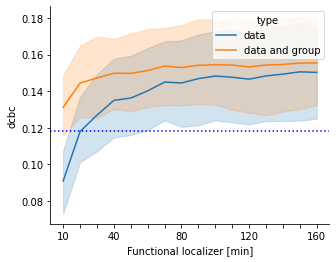

In [82]:
plot_dcbc('indivgroup_sym_MdPoNiIbWmDeSo_K68.tsv',normalize=True)